##ASSIGNMENT
#Dataset
Assume you are a scientist who is trying to make a propellent and is trying many tests to make an efficient propellent .
<br>
You have performed two tests.
<br>
From the two tests you would like whether this propellent works efficiently or not.
Build your own logistic regression model to decide .
<br>
Text with "DO NOT EDIT THIS CODE" needs to be only run do not edit it


In [236]:
#import libraries
#write your code.
import matplotlib.pyplot as plt
import numpy as np
import math





In [237]:
#load data

#write your code
data = np.loadtxt("data.txt", delimiter=',')
# data



In [238]:
#plot data to visualise
X_train=data[:,0:2]
y_train=data[:,2]

def plot_data(X,y,positive_label="y=1", negative_label="y=0"):
    # plt.scatter(X[:,0],X[:,1],c=y)
    pos = y == 1
    neg = y == 0
    plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b', label=positive_label)
    
    # Plot negative examples
    plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r', label=negative_label)
#write your code




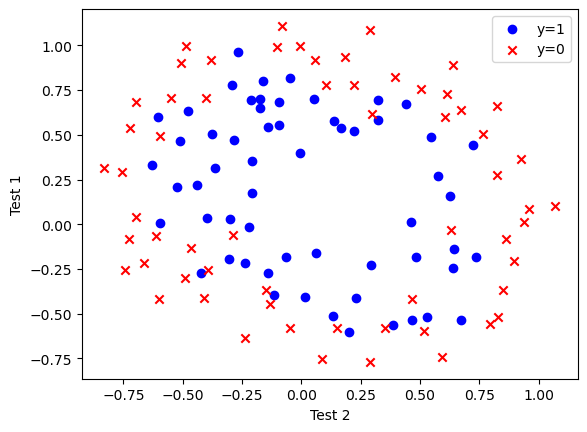

In [239]:
#test
plot_data(X_train, y_train[:])


plt.xlabel('Test 2')
plt.ylabel('Test 1')
plt.legend(loc="upper right")
plt.show()


In [240]:
#feature mapping
def map_feature(X1,X2):
     X1=np.atleast_1d(X1)
     X2=np.atleast_1d(X2)
     degree=6
     out=[]
     for i in range(1,degree+1):
       for j in range(i+1):
         out.append((X1**(i-j) * (X2**j)))
     return np.stack(out, axis=1)
#write your code




In [241]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [242]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')

In [243]:
#sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))
#write your code




In [244]:
sigmoid_test(sigmoid)


Tests passed!


In [245]:
# @title DO NOT EDIT THIS CODE
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

In [246]:
#computing cost
def compute_cost(X,y,w,b,lambda_=1):
    m = X.shape[0]  
    z = X.dot(w) + b
    predictions = sigmoid(z)
    cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    # reg_cost = (lambda_ / (2 * m)) * np.sum(w ** 2)
    total_cost = cost 
   
    return total_cost

In [247]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# test
compute_cost_test(compute_cost)

Cost at test w,b: 11.777
Tests passed!


In [248]:
#compute regularised cost
def compute_cost_reg(X, y, w, b, lambda_ = 1):
#write your code
    m = X.shape[0]
    z = X.dot(w) + b
    predictions = sigmoid(z)
    cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    reg_cost = (lambda_ / (2 * m)) * np.sum(w ** 2)
    total_cost = cost + reg_cost
    return total_cost



  


In [249]:
# @title DO NOT EDIT THIS CODE
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

In [250]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)

#test
compute_cost_reg_test(compute_cost_reg)

Regularised cost : 0.6618252552483951
All tests passed!


In [251]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)

    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mTests passed!')

In [252]:
#compute gradient
def compute_gradient(X, y, w, b, lambda_=None):
#write your code
    m = X.shape[0]
    z = X.dot(w) + b
    predictions = sigmoid(z)
    error = predictions - y
    dj_dw = (1 / m) * X.T.dot(error) 
    dj_db = (1 / m) * np.sum(error)
    return dj_db, dj_dw

In [253]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# test
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.4915254236924827
dj_dw at test_w: [-0.008601361012465376, -0.09147300847306206]
Tests passed!


In [254]:
#compute regularised gradient
def compute_gradient_reg(X, y, w, b, lambda_=1):
#write your code
    m = X.shape[0]
    z = X.dot(w) + b
    predictions = sigmoid(z)
    error = predictions - y
    dj_dw = (1 / m) * X.T.dot(error) + (lambda_ / m) * w
    dj_db = (1 / m) * np.sum(error)

    return dj_db, dj_dw




In [255]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(5)
    b = 0.2
    X = np.random.randn(7, 5)
    y = np.array([0, 1, 1, 0, 1, 1, 0])
    lambda_ = 0.1
    expected1 = (-0.1506447567869257, np.array([ 0.19530838, -0.00632206,  0.19687367,  0.15741161,  0.02791437]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)

    assert np.isclose(dj_db, expected1[0]), f"Wrong dj_db. Expected: {expected1[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected1[1]), f"Wrong dj_dw. Expected: {expected1[1]} got: {dj_dw}"


    w = np.random.randn(7)
    b = 0
    X = np.random.randn(7, 7)
    y = np.array([1, 0, 0, 0, 1, 1, 0])
    lambda_ = 0
    expected2 = (0.02660329857573818, np.array([ 0.23567643, -0.06921029, -0.19705212, -0.0002884 ,  0.06490588,
        0.26948175,  0.10777992]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    assert np.isclose(dj_db, expected2[0]), f"Wrong dj_db. Expected: {expected2[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected2[1]), f"Wrong dj_dw. Expected: {expected2[1]} got: {dj_dw}"

    print('\033[92mTests passed!')

In [256]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}" )
#test
# compute_gradient_test(compute_gradient_reg)

dj_db: 0.07138288792343654


In [257]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.01
iterations = 10000
alpha = 0.01

def gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_):
    w = initial_w
    b = initial_b
    J_history = []

    for i in range (iterations):
        dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, w, b, lambda_)
        
        # Update the parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Optionally, compute and record the cost
        if i % 100 == 0 or i == iterations - 1:
            cost = compute_cost_reg(X_mapped, y_train, w, b, lambda_)
            J_history.append(cost)
            print(f"Iteration {i}: Cost {cost:.4f}")

    return w, b, J_history, None  # The last return value is None to match the expected unpacking



w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)


Iteration 0: Cost 0.7210
Iteration 100: Cost 0.6712
Iteration 200: Cost 0.6432
Iteration 300: Cost 0.6268
Iteration 400: Cost 0.6164
Iteration 500: Cost 0.6092
Iteration 600: Cost 0.6036
Iteration 700: Cost 0.5990
Iteration 800: Cost 0.5949
Iteration 900: Cost 0.5911
Iteration 1000: Cost 0.5875
Iteration 1100: Cost 0.5840
Iteration 1200: Cost 0.5807
Iteration 1300: Cost 0.5775
Iteration 1400: Cost 0.5744
Iteration 1500: Cost 0.5713
Iteration 1600: Cost 0.5683
Iteration 1700: Cost 0.5654


Iteration 1800: Cost 0.5626
Iteration 1900: Cost 0.5599
Iteration 2000: Cost 0.5571
Iteration 2100: Cost 0.5545
Iteration 2200: Cost 0.5519
Iteration 2300: Cost 0.5494
Iteration 2400: Cost 0.5469
Iteration 2500: Cost 0.5445
Iteration 2600: Cost 0.5422
Iteration 2700: Cost 0.5398
Iteration 2800: Cost 0.5376
Iteration 2900: Cost 0.5354
Iteration 3000: Cost 0.5332
Iteration 3100: Cost 0.5311
Iteration 3200: Cost 0.5290
Iteration 3300: Cost 0.5269
Iteration 3400: Cost 0.5249
Iteration 3500: Cost 0.5230
Iteration 3600: Cost 0.5210
Iteration 3700: Cost 0.5191
Iteration 3800: Cost 0.5173
Iteration 3900: Cost 0.5155
Iteration 4000: Cost 0.5137
Iteration 4100: Cost 0.5119
Iteration 4200: Cost 0.5102
Iteration 4300: Cost 0.5085
Iteration 4400: Cost 0.5068
Iteration 4500: Cost 0.5052
Iteration 4600: Cost 0.5036
Iteration 4700: Cost 0.5020
Iteration 4800: Cost 0.5005
Iteration 4900: Cost 0.4990
Iteration 5000: Cost 0.4975
Iteration 5100: Cost 0.4960
Iteration 5200: Cost 0.4945
Iteration 5300: Cost

In [258]:
#plot decision boundary
def plot_decision_boundary(w,b,X,y):
    # Set min and max values and give some margin
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01  # Step size in the mesh

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Map the features for the grid points
    grid_points = map_feature(xx.ravel(), yy.ravel())

    # Predict the function value for the whole grid
    Z = sigmoid(np.dot(grid_points, w) + b)
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['#FFAAAA', '#AAAAFF'], alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()
#write your code






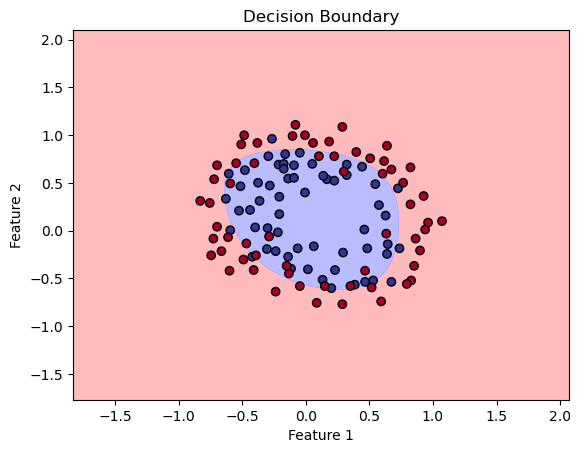

In [259]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [260]:
#predict your training model
def predict(X, w, b):
  m,n=X.shape
  p=np.zeros(m)
  #write your code
  z = X.dot(w) + b
  predictions = sigmoid(z)
 
  p = predictions >= 0.5
    






  return p

In [261]:
p = predict(X_mapped, w, b)

print('Accuracy of training model: %f'%(np.mean(p == y_train) * 100))

Accuracy of training model: 82.203390
